# Polish Companies Bankruptcy Data
In this project we want to explore data from Polish companies which have been gathered for five years and we are going to train models on the data to predict which companies are more vulnerable to bankruptcy by predicting the behaviour from the features extracted from the financial statements and other indicators.

## The Data
The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.

The data contains 64 features, 1 target class vriable, and 5 files for 5 years of data gathered from several thousand companies in Poland. We also have a data_dictionary file that we can use to understand what each feature corresponds to.

For more information about the data you can visit the https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data


## 1 - EDA
We start our project with the importing and exploring the data, understanding the data, handling the features, merging the data from different files, and finding patterns in the features that could be useful for us in training the models.

### Data Importing:

We start with building a spark session since we will be executing this project using Spark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder \
    .appName("BaseballBatting") \
    .master("local[*]") \
    .config("spark.sql.shuffle.partitions", "8") \
    .getOrCreate()

print("Spark version:", spark.version)


print(spark)

Spark version: 4.0.1


Since our data was in *.arff* format we import the data using the *arff* library and create spark dataframes from all the files.

In [2]:
import arff

# Load ARFF files
data1 = arff.load(open('./1year.arff', 'r'))
data2 = arff.load(open('./2year.arff', 'r'))
data3 = arff.load(open('./3year.arff', 'r'))
data4 = arff.load(open('./4year.arff', 'r'))
data5 = arff.load(open('./5year.arff', 'r'))
# Create Spark DataFrames from ARFF files data
attributes = [attr[0] for attr in data1['attributes']]
year1_df = spark.createDataFrame(data1['data'], schema=attributes)
year2_df = spark.createDataFrame(data2['data'], schema=attributes)
year3_df = spark.createDataFrame(data3['data'], schema=attributes)
year4_df = spark.createDataFrame(data4['data'], schema=attributes)
year5_df = spark.createDataFrame(data5['data'], schema=attributes)

### Data Exploration:

We explore the data below. We show the dataframes and try to understande the features and the target class. we print the dataframe for each year and at the end merge them to start our further processing

In [3]:
# Show the year 1 Spark DataFrame
print("All data in year 1: ", year1_df.count())
year1_df.show(5)

All data in year 1:  7027
+--------+-------+-------+------+-------+-------+--------+-------+------+-------+--------+-------+--------+--------+------+-------+------+--------+--------+------+------+-------+--------+-------+-------+-------+-------+------+------+-------+--------+------+------+-------+-------+------+------+-------+--------+--------+--------+--------+------+------+-------+-------+------+--------+--------+------+-------+-------+------+------+--------+--------+-------+-------+--------+------+------+------+------+------+-----+
|   Attr1|  Attr2|  Attr3| Attr4|  Attr5|  Attr6|   Attr7|  Attr8| Attr9| Attr10|  Attr11| Attr12|  Attr13|  Attr14|Attr15| Attr16|Attr17|  Attr18|  Attr19|Attr20|Attr21| Attr22|  Attr23| Attr24| Attr25| Attr26| Attr27|Attr28|Attr29| Attr30|  Attr31|Attr32|Attr33| Attr34| Attr35|Attr36|Attr37| Attr38|  Attr39|  Attr40|  Attr41|  Attr42|Attr43|Attr44| Attr45| Attr46|Attr47|  Attr48|  Attr49|Attr50| Attr51| Attr52|Attr53|Attr54|  Attr55|  Attr56| Attr57| At

In [4]:
# Show the year 2 Spark DataFrame
print("All data in year 2: ", year2_df.count())
year2_df.show(5)

All data in year 2:  10173
+--------+-------+--------+------+-------+----------+-------+-------+-------+-------+--------+--------+--------+-------+------+--------+------+-------+--------+------+------+--------+--------+-------+--------+--------+------+--------+------+-------+--------+------+-------+-------+--------+-------+------+-------+-------+--------+--------+-------+------+------+-------+-------+------+--------+-------+-------+-------+-------+------+------+--------+-------+--------+-------+---------+------+-------+------+-------+------+-----+
|   Attr1|  Attr2|   Attr3| Attr4|  Attr5|     Attr6|  Attr7|  Attr8|  Attr9| Attr10|  Attr11|  Attr12|  Attr13| Attr14|Attr15|  Attr16|Attr17| Attr18|  Attr19|Attr20|Attr21|  Attr22|  Attr23| Attr24|  Attr25|  Attr26|Attr27|  Attr28|Attr29| Attr30|  Attr31|Attr32| Attr33| Attr34|  Attr35| Attr36|Attr37| Attr38| Attr39|  Attr40|  Attr41| Attr42|Attr43|Attr44| Attr45| Attr46|Attr47|  Attr48| Attr49| Attr50| Attr51| Attr52|Attr53|Attr54|  Attr5

In [5]:
# Show the year 3 Spark DataFrame
print("All data in year 3: ", year3_df.count())
year3_df.show(5)

All data in year 3:  10503
+---------+-------+-------+------+-------+-------+---------+------+------+-------+---------+--------+--------+---------+------+-------+------+---------+---------+------+-------+--------+---------+-------+-------+-------+-------+-------+------+--------+---------+------+------+-------+--------+------+--------+-------+--------+--------+--------+--------+------+------+---------+-------+------+---------+---------+------+-------+-------+------+------+--------+---------+---------+-------+---------+------+------+------+------+------+-----+
|    Attr1|  Attr2|  Attr3| Attr4|  Attr5|  Attr6|    Attr7| Attr8| Attr9| Attr10|   Attr11|  Attr12|  Attr13|   Attr14|Attr15| Attr16|Attr17|   Attr18|   Attr19|Attr20| Attr21|  Attr22|   Attr23| Attr24| Attr25| Attr26| Attr27| Attr28|Attr29|  Attr30|   Attr31|Attr32|Attr33| Attr34|  Attr35|Attr36|  Attr37| Attr38|  Attr39|  Attr40|  Attr41|  Attr42|Attr43|Attr44|   Attr45| Attr46|Attr47|   Attr48|   Attr49|Attr50| Attr51| Attr52|

In [6]:
# Show the year 4 Spark DataFrame
print("All data in year 4: ", year4_df.count())
year4_df.show(5)

All data in year 4:  9792
+--------+-------+-------+------+-------+---------+--------+-------+------+-------+--------+--------+---------+--------+-------+--------+------+--------+---------+------+-------+---------+---------+-------+--------+--------+-------+-------+------+---------+---------+------+------+-------+--------+------+------+-------+---------+--------+--------+---------+------+------+--------+-------+------+--------+---------+------+-------+-------+-------+------+-------+---------+--------+-------+--------+------+------+------+------+------+-----+
|   Attr1|  Attr2|  Attr3| Attr4|  Attr5|    Attr6|   Attr7|  Attr8| Attr9| Attr10|  Attr11|  Attr12|   Attr13|  Attr14| Attr15|  Attr16|Attr17|  Attr18|   Attr19|Attr20| Attr21|   Attr22|   Attr23| Attr24|  Attr25|  Attr26| Attr27| Attr28|Attr29|   Attr30|   Attr31|Attr32|Attr33| Attr34|  Attr35|Attr36|Attr37| Attr38|   Attr39|  Attr40|  Attr41|   Attr42|Attr43|Attr44|  Attr45| Attr46|Attr47|  Attr48|   Attr49|Attr50| Attr51| Attr

In [7]:
# Show the year 5 Spark DataFrame
print("All data in year 5: ", year5_df.count())
year5_df.show(5)

All data in year 5:  5910
+---------+-------+-------+------+-------+---------+---------+-------+------+-------+---------+---------+--------+---------+------+--------+------+---------+---------+------+-------+--------+---------+-------+--------+--------+-------+--------+------+--------+--------+------+------+-------+---------+------+------+-------+---------+--------+--------+--------+------+------+---------+-------+------+---------+---------+-------+-------+-------+-------+-------+-------+---------+---------+-------+--------+------+------+------+------+------+-----+
|    Attr1|  Attr2|  Attr3| Attr4|  Attr5|    Attr6|    Attr7|  Attr8| Attr9| Attr10|   Attr11|   Attr12|  Attr13|   Attr14|Attr15|  Attr16|Attr17|   Attr18|   Attr19|Attr20| Attr21|  Attr22|   Attr23| Attr24|  Attr25|  Attr26| Attr27|  Attr28|Attr29|  Attr30|  Attr31|Attr32|Attr33| Attr34|   Attr35|Attr36|Attr37| Attr38|   Attr39|  Attr40|  Attr41|  Attr42|Attr43|Attr44|   Attr45| Attr46|Attr47|   Attr48|   Attr49| Attr50| 

In [8]:
df_all = year1_df.union(year2_df).union(year3_df).union(year4_df).union(year5_df)
print("All data combined: ", df_all.count())
df_all.show(5)

All data combined:  43405
+--------+-------+-------+------+-------+-------+--------+-------+------+-------+--------+-------+--------+--------+------+-------+------+--------+--------+------+------+-------+--------+-------+-------+-------+-------+------+------+-------+--------+------+------+-------+-------+------+------+-------+--------+--------+--------+--------+------+------+-------+-------+------+--------+--------+------+-------+-------+------+------+--------+--------+-------+-------+--------+------+------+------+------+------+-----+
|   Attr1|  Attr2|  Attr3| Attr4|  Attr5|  Attr6|   Attr7|  Attr8| Attr9| Attr10|  Attr11| Attr12|  Attr13|  Attr14|Attr15| Attr16|Attr17|  Attr18|  Attr19|Attr20|Attr21| Attr22|  Attr23| Attr24| Attr25| Attr26| Attr27|Attr28|Attr29| Attr30|  Attr31|Attr32|Attr33| Attr34| Attr35|Attr36|Attr37| Attr38|  Attr39|  Attr40|  Attr41|  Attr42|Attr43|Attr44| Attr45| Attr46|Attr47|  Attr48|  Attr49|Attr50| Attr51| Attr52|Attr53|Attr54|  Attr55|  Attr56| Attr57| At

### Data Analysis:

We analyse the underlying patterns in our data, and find the class imbalances that needs to be targetted later on. We also want to find which features we should be feeding to our models in order to minimize the computating processing and recieve best results.

In [9]:
# we create a temporary view for SQL queries

df_all.createOrReplaceTempView("data_all")

In [10]:
# We print the count of each target class to know if our data contains imbalance.

spark.sql("""
SELECT class, COUNT(*) as count, 
ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS percentage 
FROM data_all 
GROUP BY class
""").show()

+-----+-----+----------+
|class|count|percentage|
+-----+-----+----------+
|    0|41314|     95.18|
|    1| 2091|      4.82|
+-----+-----+----------+



In [11]:
spark.sql("""
SELECT COUNT(*) - COUNT(DISTINCT struct(*)) AS duplicate_rows
FROM data_all
""").show()

+--------------+
|duplicate_rows|
+--------------+
|           401|
+--------------+



In [12]:
# We calculate the mean and standard deviation for each feature grouped by the target class.
# we do this because we want to see if there are significant differences between the classes.

from pyspark.sql.functions import mean, stddev

df_all.groupBy("class").agg(
    *[mean(c).alias(c+"_mean") for c in df_all.columns if c != "class"]
).show()
df_all.groupBy("class").agg(
    *[stddev(c).alias(c+"_stddev") for c in df_all.columns if c != "class"]
).show()

+-----+-------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+--------------------+-----------------+------------------+--------------------+-------------------+--------------------+-------------------+-------------------+------------------+------------------+-----------------+-----------------+--------------------+-----------------+------------------+-----------------+-------------------+------------------+------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+--------------

In [13]:
# In the above calculations, outliers skewed the results heavily.
# To reduce the effect of outliers, we compute the mean and standard deviation after removing
# values outside the 10th and 90th percentiles for each numeric feature.

from pyspark.sql.functions import col, when, round

# Numeric features
numeric_cols = [c for c in df_all.columns if c != "class"]

# 1 Compute 10th and 90th percentiles
percentiles = df_all.approxQuantile(numeric_cols, [0.1, 0.9], 0.01)
bounds = {c: percentiles[i] for i, c in enumerate(numeric_cols)}

mean_exprs = [
    round(
        mean(
            when((col(c) >= bounds[c][0]) & (col(c) <= bounds[c][1]), col(c))
        ),
        4
    ).alias(f"{c}_mean")
    for c in numeric_cols
]

df_all.groupBy("class").agg(*mean_exprs).show()

std_exprs = [
    round(
        stddev(
            when((col(c) >= bounds[c][0]) & (col(c) <= bounds[c][1]), col(c))
        ),
        4
    ).alias(f"{c}_stddev")
    for c in numeric_cols
]

df_all.groupBy("class").agg(*std_exprs).show()

+-----+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|class|Attr1_mean|Attr2_mean|Attr3_mean|Attr4_mean|Attr5_mean|Attr6_mean|Attr7_mean|Attr8_mean|Attr9_mean|Attr10_mean|Attr11_mean|Attr12_mean|Attr13_mean|Attr14_mean|Attr15_mean|Attr16_mean|Attr17_mean|Attr18_mean|Attr19_mean|Attr20_

### Ranking feature importance for our data:

As we have 64 features in the data, where all the features might not be important or relevant to predicting bankruptcy, and to reduce the computation requied for training the data. I tried to calculate the predictive strength of each feature using the difference of means for each class divided by the combined root of the standard deviations for each class. 

This gives us a good indication of whether a feature would signal good predictive strength or not.

In [14]:
# save class-wise mean and stddev to variables
mean_stats = df_all.groupBy("class").agg(
    *[
        mean(
            when((col(c) >= bounds[c][0]) & (col(c) <= bounds[c][1]), col(c))
        ).alias(c)
        for c in numeric_cols
    ]
).collect()

std_stats = df_all.groupBy("class").agg(
    *[
        stddev(
            when((col(c) >= bounds[c][0]) & (col(c) <= bounds[c][1]), col(c))
        ).alias(c)
        for c in numeric_cols
    ]
).collect()

In [16]:
import math
import builtins

mean0 = {c: mean_stats[0][c] for c in numeric_cols}
mean1 = {c: mean_stats[1][c] for c in numeric_cols}
std0  = {c: std_stats[0][c] for c in numeric_cols}
std1  = {c: std_stats[1][c] for c in numeric_cols}

# Compute signal strength
signal = {}
for c in numeric_cols:
    if mean0[c] is None or mean1[c] is None or std0[c] is None or std1[c] is None:
        signal[c] = 0
        continue

    pooled_std = math.sqrt(std0[c]**2 + std1[c]**2)
    signal[c] = math.fabs(mean1[c] - mean0[c]) / pooled_std if pooled_std != 0 else 0

# Rank features
signal_ranked = sorted(signal.items(), key=lambda x: x[1], reverse=True)

for f, s in signal_ranked:
    print(f"{f}: {builtins.round(s,4)}")

Attr24: 0.4887
Attr13: 0.4123
Attr26: 0.4059
Attr16: 0.4019
Attr12: 0.384
Attr38: 0.3688
Attr10: 0.3633
Attr23: 0.3615
Attr2: 0.3577
Attr25: 0.3488
Attr31: 0.3467
Attr19: 0.3457
Attr5: 0.3428
Attr51: 0.3427
Attr17: 0.3412
Attr8: 0.3397
Attr46: 0.3354
Attr4: 0.3197
Attr1: 0.3178
Attr18: 0.3167
Attr14: 0.3165
Attr7: 0.3163
Attr50: 0.311
Attr45: 0.3063
Attr3: 0.2848
Attr55: 0.2823
Attr11: 0.2774
Attr62: 0.2656
Attr6: 0.2554
Attr39: 0.2525
Attr53: 0.2507
Attr63: 0.2472
Attr30: 0.2433
Attr32: 0.2343
Attr35: 0.222
Attr41: 0.2195
Attr33: 0.2193
Attr52: 0.2117
Attr54: 0.2116
Attr40: 0.2091
Attr42: 0.2005
Attr57: 0.1963
Attr49: 0.1955
Attr56: 0.193
Attr28: 0.1927
Attr22: 0.1719
Attr48: 0.1698
Attr58: 0.145
Attr21: 0.1424
Attr61: 0.0941
Attr27: 0.0788
Attr44: 0.065
Attr37: 0.0626
Attr34: 0.048
Attr20: 0.0423
Attr29: 0.0406
Attr15: 0.0318
Attr36: 0.0314
Attr60: 0.0278
Attr43: 0.0272
Attr59: 0.0163
Attr64: 0.0125
Attr9: 0.0053
Attr47: 0.0049


### Visualizing our findings:

After finding the strongest feature according to our claculations, we try to plot them by class distribution so that we could see if they really contain the statistical power to differentiate between target classes

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = [f[0] for f in signal_ranked[:] if f[1] > 0.3]
df_pd = df_all.select(top_features + ["class"]).toPandas()

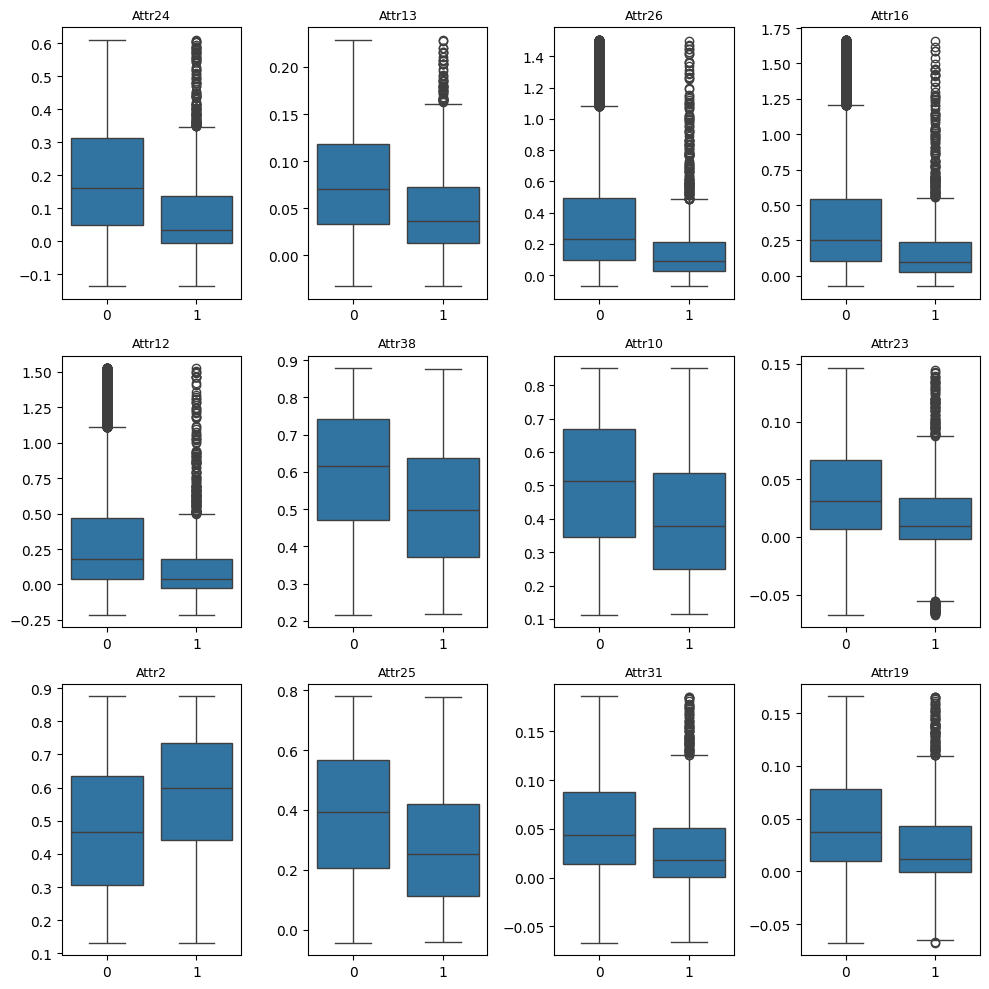

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(10, 10))  # 12 plots
axes = axes.flatten()

for ax, f in zip(axes, top_features):
    p10, p90 = df_pd[f].quantile([0.1, 0.9])

    df_plot = df_pd[(df_pd[f] >= p10) & (df_pd[f] <= p90)]

    sns.boxplot(x="class", y=f, data=df_plot, ax=ax)
    ax.set_title(f, fontsize=9)
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

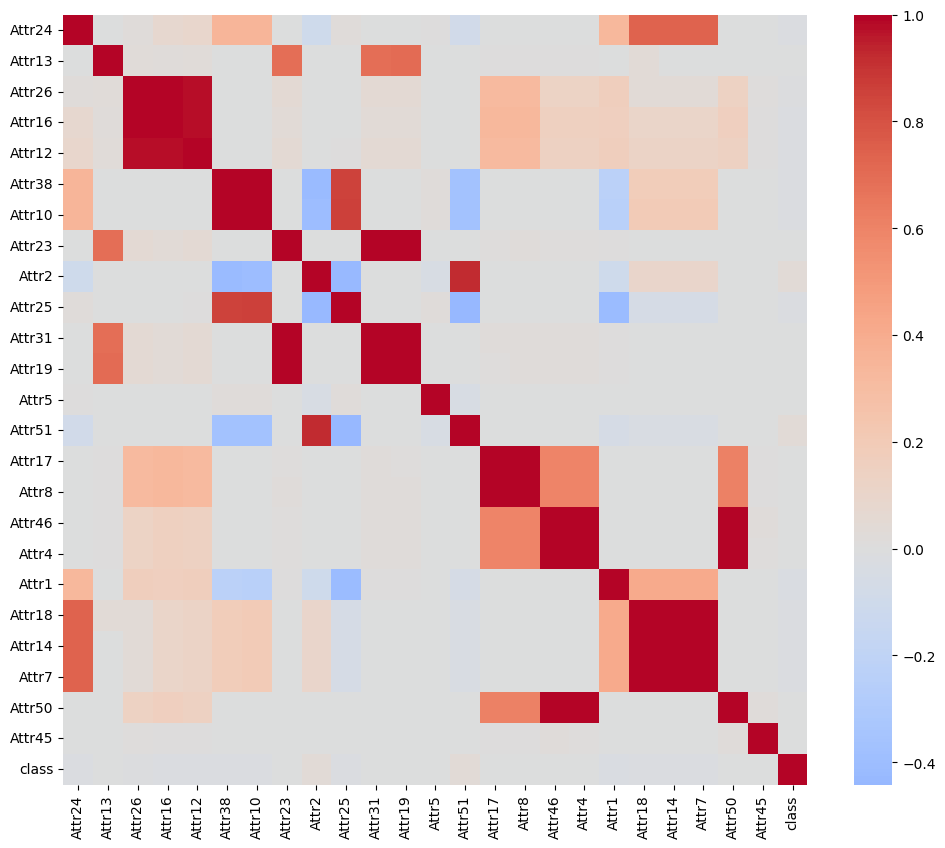

In [19]:
corr = df_pd.corr()  # pandas correlation

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

### Selecting final features to export for training models:

As we found the most important features and ploted the correlation heatmap, we can now select the features based on the signal strength and also avoid multi-colenearity.

In [20]:
selected_features = top_features[:]

final_cols = selected_features + ["class"]

df_final = df_all.select(*final_cols)

df_final.dropDuplicates()

df_final.show(5)

+-------+--------+-------+-------+-------+-------+-------+--------+-------+-------+--------+--------+-------+-------+------+-------+-------+------+--------+--------+--------+--------+------+-------+-----+
| Attr24|  Attr13| Attr26| Attr16| Attr12| Attr38| Attr10|  Attr23|  Attr2| Attr25|  Attr31|  Attr19|  Attr5| Attr51|Attr17|  Attr8| Attr46| Attr4|   Attr1|  Attr18|  Attr14|   Attr7|Attr50| Attr45|class|
+-------+--------+-------+-------+-------+-------+-------+--------+-------+-------+--------+--------+-------+-------+------+-------+-------+------+--------+--------+--------+--------+------+-------+-----+
|0.47706|  0.1666|0.60411|0.73378| 0.6598|0.50591|0.50494| 0.11998|0.37951|0.50494| 0.14942| 0.14942| 32.351|0.37854|2.6349| 1.3305| 1.5225|2.0472| 0.20055| 0.24976| 0.24976| 0.24976| 2.042| 1.0097|    0|
|   NULL| 0.15835|0.43992|0.53838| 0.5168|0.49788|0.49788| 0.12304|0.49988|0.39542|   0.152|   0.152| 14.786|0.49988|2.0005|0.99601| 1.1252|1.9447| 0.20912| 0.25834| 0.25834| 0.258

In [21]:
# Handle missing values using median imputation
# I used median imputation because it is more robust to outliers compared to mean imputation.

from pyspark.ml.feature import Imputer

feature_cols = [c for c in df_final.columns if c != "class"]
imputer = Imputer(
    inputCols=feature_cols,
    outputCols=[c for c in feature_cols]
).setStrategy("median")

df_final = imputer.fit(df_final).transform(df_final)
df_final.show(5)

+-------+--------+-------+-------+-------+-------+-------+--------+-------+-------+--------+--------+-------+-------+------+-------+-------+------+--------+--------+--------+--------+------+-------+-----+
| Attr24|  Attr13| Attr26| Attr16| Attr12| Attr38| Attr10|  Attr23|  Attr2| Attr25|  Attr31|  Attr19|  Attr5| Attr51|Attr17|  Attr8| Attr46| Attr4|   Attr1|  Attr18|  Attr14|   Attr7|Attr50| Attr45|class|
+-------+--------+-------+-------+-------+-------+-------+--------+-------+-------+--------+--------+-------+-------+------+-------+-------+------+--------+--------+--------+--------+------+-------+-----+
|0.47706|  0.1666|0.60411|0.73378| 0.6598|0.50591|0.50494| 0.11998|0.37951|0.50494| 0.14942| 0.14942| 32.351|0.37854|2.6349| 1.3305| 1.5225|2.0472| 0.20055| 0.24976| 0.24976| 0.24976| 2.042| 1.0097|    0|
|0.15474| 0.15835|0.43992|0.53838| 0.5168|0.49788|0.49788| 0.12304|0.49988|0.39542|   0.152|   0.152| 14.786|0.49988|2.0005|0.99601| 1.1252|1.9447| 0.20912| 0.25834| 0.25834| 0.258

In [22]:
df_final.printSchema()
df_final.select([c for c in df_final.columns if c != "class"]).summary().show()

root
 |-- Attr24: double (nullable = true)
 |-- Attr13: double (nullable = true)
 |-- Attr26: double (nullable = true)
 |-- Attr16: double (nullable = true)
 |-- Attr12: double (nullable = true)
 |-- Attr38: double (nullable = true)
 |-- Attr10: double (nullable = true)
 |-- Attr23: double (nullable = true)
 |-- Attr2: double (nullable = true)
 |-- Attr25: double (nullable = true)
 |-- Attr31: double (nullable = true)
 |-- Attr19: double (nullable = true)
 |-- Attr5: double (nullable = true)
 |-- Attr51: double (nullable = true)
 |-- Attr17: double (nullable = true)
 |-- Attr8: double (nullable = true)
 |-- Attr46: double (nullable = true)
 |-- Attr4: double (nullable = true)
 |-- Attr1: double (nullable = true)
 |-- Attr18: double (nullable = true)
 |-- Attr14: double (nullable = true)
 |-- Attr7: double (nullable = true)
 |-- Attr50: double (nullable = true)
 |-- Attr45: double (nullable = true)
 |-- class: string (nullable = true)

+-------+-------------------+------------------+---

### Export the final dataframe to a *.csv* file:

I exported the final dataframe to a csv file using spark and now we can use this csv file in our models training jupter file to train and evaluate our models.

In [23]:
df_final.coalesce(1).write \
    .mode("overwrite") \
    .option("header", True) \
    .csv("cleaned_bankruptcy_data")
